## Question 1
EDA – Telecom Customer Usage (Easy)

In [1]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Step 2: Load Dataset
df = pd.read_csv(r"D:\DATA\DESK\AI exam questions\dataset1.csv")  # Update path if needed

In [3]:
#  Step 3: Inspect Dataset
print("Shape:", df.shape)

Shape: (7043, 21)


In [4]:
print("\nData Types:\n", df.dtypes)


Data Types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [5]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# Step 4: Handle 'TotalCharges' (Convert to numeric)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

C:\Users\419376\AppData\Local\Temp\ipykernel_30032\1776084661.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [8]:
#  Step 5: Create Tenure Groups
def tenure_group(tenure):
    if tenure <= 12:
        return "Low"
    elif 12 < tenure <= 48:
        return "Medium"
    else:
        return "High"

df["tenure_group"] = df["tenure"].apply(tenure_group)

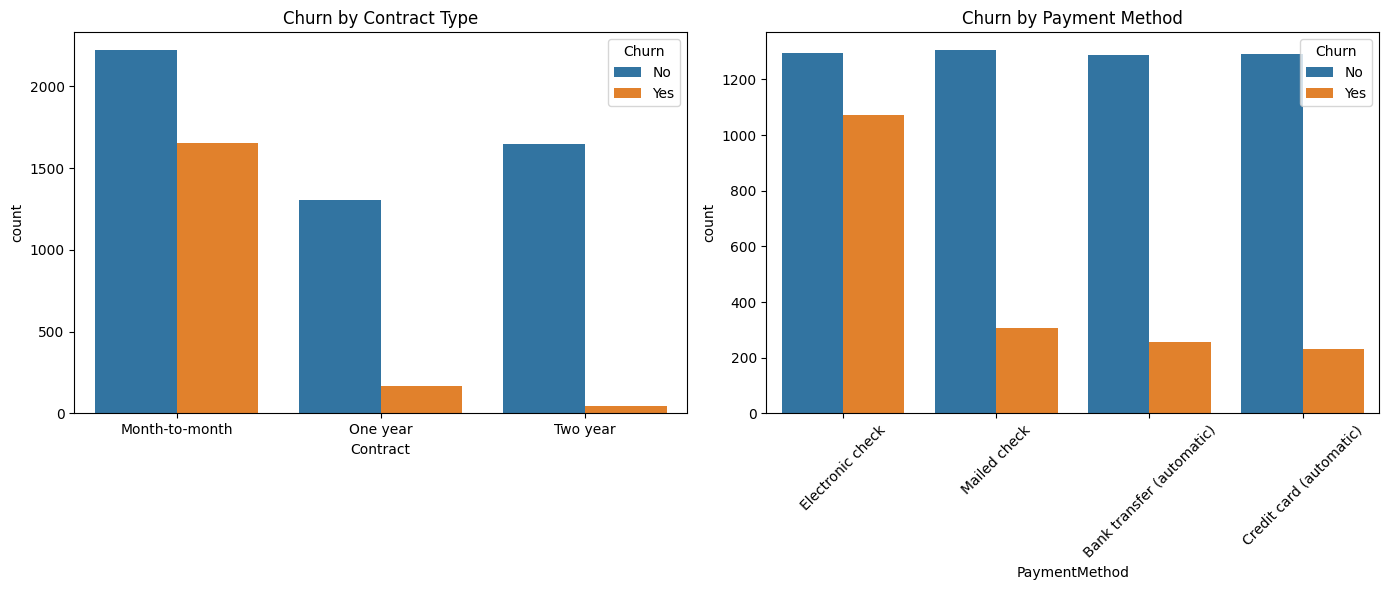

In [9]:
# Step 6: Visualize Churn Trends
plt.figure(figsize=(14, 6))

# Plot 1 - Churn by Contract Type
plt.subplot(1, 2, 1)
sns.countplot(data=df, x="Contract", hue="Churn")
plt.title("Churn by Contract Type")

# Plot 2 - Churn by Payment Method
plt.subplot(1, 2, 2)
sns.countplot(data=df, x="PaymentMethod", hue="Churn")
plt.xticks(rotation=45)
plt.title("Churn by Payment Method")

plt.tight_layout()
plt.show()

In [10]:
# Step 7: Normalize Numerical Columns
scaler = MinMaxScaler()
df[["MonthlyCharges", "TotalCharges"]] = scaler.fit_transform(df[["MonthlyCharges", "TotalCharges"]])

# Step 8: Final View of Key Columns
print("\nSample Processed Data:\n", df[["tenure", "tenure_group", "MonthlyCharges", "TotalCharges", "Churn"]].head())


Sample Processed Data:
    tenure tenure_group  MonthlyCharges  TotalCharges Churn
0       1          Low        0.115423      0.001275    No
1      34       Medium        0.385075      0.215867    No
2       2          Low        0.354229      0.010310   Yes
3      45       Medium        0.239303      0.210241    No
4       2          Low        0.521891      0.015330   Yes


## Question 2 
Classification – Predict Customer Churn (Medium)

In [11]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of the dataframe
df_model = df.copy()

# Apply LabelEncoder to all object columns
le = LabelEncoder()
for column in df_model.select_dtypes(include='object').columns:
    df_model[column] = le.fit_transform(df_model[column])

In [12]:
# Check encoded data
df_model.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,2,0.115423,0.001275,0,1
1,3962,1,0,0,0,34,1,0,0,2,...,0,0,0,1,0,3,0.385075,0.215867,0,2
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,1,3,0.354229,0.010310,1,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,0,0,1,0,0,0.239303,0.210241,0,2
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,1,2,0.521891,0.015330,1,1


In [13]:
from sklearn.model_selection import train_test_split

# Drop customerID as it's not useful for prediction
X = df_model.drop(columns=["Churn", "customerID"])
y = df_model["Churn"]

In [14]:
# Split into 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [16]:
# Train each model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [17]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [18]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    "Logistic Regression": log_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n📊 {name} Evaluation:")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))


📊 Logistic Regression Evaluation:
Accuracy : 0.7977288857345636
Precision: 0.6478405315614618
Recall   : 0.5213903743315508
F1 Score : 0.5777777777777777

📊 Decision Tree Evaluation:
Accuracy : 0.7253371185237757
Precision: 0.4830287206266319
Recall   : 0.4946524064171123
F1 Score : 0.48877146631439894

📊 Random Forest Evaluation:
Accuracy : 0.7885024840312278
Precision: 0.6301369863013698
Recall   : 0.4919786096256685
F1 Score : 0.5525525525525525


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

# Initialize grid search
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='f1')
grid.fit(X_train, y_train)

# Best model
best_logreg = grid.best_estimator_

# Print best params
print("✅ Best Hyperparameters for Logistic Regression:")
print(grid.best_params_)


✅ Best Hyperparameters for Logistic Regression:
{'C': 1, 'solver': 'lbfgs'}


In [21]:
import pandas as pd
import numpy as np

# Get feature names and their coefficients
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': best_logreg.coef_[0]
})

# Sort by absolute value to see most impactful features
importance_df['Abs_Coefficient'] = np.abs(importance_df['Coefficient'])
importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Show top 10
print(" Top 10 Important Features:")
print(importance_df[['Feature', 'Coefficient']].head(10))


 Top 10 Important Features:
             Feature  Coefficient
17    MonthlyCharges     2.595316
5       PhoneService    -0.897257
14          Contract    -0.784725
18      TotalCharges     0.661652
15  PaperlessBilling     0.406746
19      tenure_group    -0.292766
8     OnlineSecurity    -0.281079
11       TechSupport    -0.253088
7    InternetService     0.227960
3         Dependents    -0.220997


C:\Users\419376\AppData\Local\Temp\ipykernel_30032\369953667.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, x='Abs_Coefficient', y='Feature', palette='viridis')
C:\Users\419376\AppData\Local\Temp\ipykernel_30032\369953667.py:25: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\419376\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


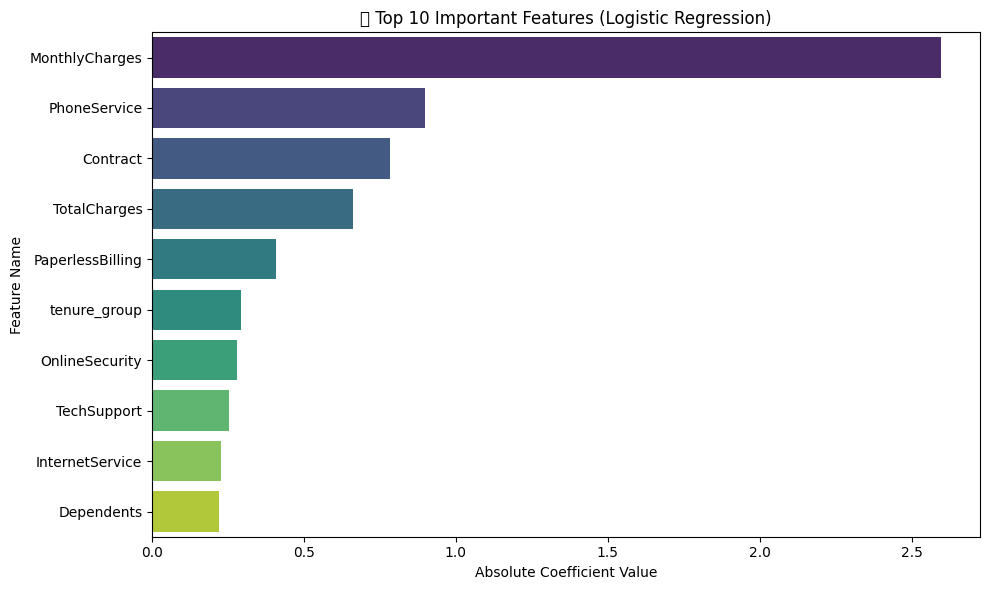

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature names and coefficients
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': best_logreg.coef_[0]
})

# Sort by absolute value
importance_df['Abs_Coefficient'] = np.abs(importance_df['Coefficient'])
importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Select top 10 features
top_features = importance_df.head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_features, x='Abs_Coefficient', y='Feature', palette='viridis')
plt.title('🔍 Top 10 Important Features (Logistic Regression)')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()


## Question 3
Tweet Urgency Detection (Hard)

In [24]:
import pandas as pd

df = pd.read_csv(r"D:\DATA\DESK\AI exam questions\dataset2.csv")  # Use your actual path

In [25]:
df['created_at'] = pd.to_datetime(df['created_at'])

C:\Users\419376\AppData\Local\Temp\ipykernel_30032\329245698.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['created_at'] = pd.to_datetime(df['created_at'])


In [26]:
inbound_df = df[df['inbound'] == True].copy()   # customer tweets
outbound_df = df[df['inbound'] == False].copy() # support replies

In [27]:
merged_df = inbound_df.merge(
    outbound_df[['in_response_to_tweet_id', 'created_at']],
    left_on='tweet_id',
    right_on='in_response_to_tweet_id',
    suffixes=('_customer', '_support')
)


In [28]:
merged_df['response_time'] = (merged_df['created_at_support'] - merged_df['created_at_customer']).dt.total_seconds()


In [29]:
merged_df['urgency'] = merged_df['response_time'].apply(lambda x: 1 if x < 3600 else 0)


In [30]:
print(merged_df[['text', 'response_time', 'urgency']].head())


                                                text  response_time  urgency
0  @76328 I really hope you all change but I'm su...         1540.0        1
1  @VirginTrains see attached error message. I've...          473.0        1
2  @VirginTrains yep, I've tried laptop too sever...          398.0        1
3  @VirginTrains I still haven't heard &amp; the ...          428.0        1
4  @105838 @AppleSupport Me too am suffering , ho...        21662.0        0


In [31]:
import re

def clean_text(text):
    text = re.sub(r'http\S+|www\S+', '', text)   # remove URLs
    text = re.sub(r'@\w+', '', text)             # remove mentions
    text = re.sub(r'[^a-zA-Z\s]', '', text)      # remove punctuation
    text = text.lower().strip()                  # lowercase and strip
    return text

merged_df['clean_tweet'] = merged_df['text'].astype(str).apply(clean_text)

# Optional: check a few examples
print(merged_df[['text', 'clean_tweet']].head())


                                                text  \
0  @76328 I really hope you all change but I'm su...   
1  @VirginTrains see attached error message. I've...   
2  @VirginTrains yep, I've tried laptop too sever...   
3  @VirginTrains I still haven't heard &amp; the ...   
4  @105838 @AppleSupport Me too am suffering , ho...   

                                         clean_tweet  
0  i really hope you all change but im sure you w...  
1  see attached error message ive tried leaving a...  
2  yep ive tried laptop too several times over th...  
3  i still havent heard amp the number im directe...  
4  me too am suffering  hope the can find a solution  


In [32]:
import re

def clean_text(text):
    text = re.sub(r'http\S+|www\S+', '', text)   # ✅ remove URLs
    text = re.sub(r'@\w+', '', text)             # ✅ remove @mentions
    text = re.sub(r'[^a-zA-Z\s]', '', text)      # ✅ remove punctuation
    text = text.lower().strip()                  # ✅ convert to lowercase
    return text

merged_df['clean_tweet'] = merged_df['text'].astype(str).apply(clean_text)


In [33]:
from datasets import Dataset

# Prepare data for Hugging Face
train_df = merged_df[['clean_tweet', 'urgency']].dropna().copy()

# Rename columns for compatibility
train_df.rename(columns={'clean_tweet': 'text', 'urgency': 'label'}, inplace=True)

# Convert to Hugging Face dataset
dataset = Dataset.from_pandas(train_df)

# Train-test split (80-20)
dataset = dataset.train_test_split(test_size=0.2)


c:\Users\419376\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [34]:
from transformers import DistilBertTokenizerFast

# Load the tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

# Tokenization function
def tokenize_function(example):
    return tokenizer(example["text"], padding="max_length", truncation=True)

# Tokenize the dataset
tokenized_dataset = dataset.map(tokenize_function, batched=True)


c:\Users\419376\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\419376\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\419376\.cache\huggingface\hub\models--distilbert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activat

In [35]:
from transformers import DistilBertForSequenceClassification

# Load DistilBERT for binary classification (urgent vs non-urgent)
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)


c:\Users\419376\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertFor

In [39]:
from transformers import TrainingArguments, Trainer

# Set training configuration
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    num_train_epochs=5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    logging_dir="./logs",
    logging_steps=10,
    save_strategy="no"
)

# Set up Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"]
)


In [40]:
trainer.train()

c:\Users\419376\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
  0%|          | 0/15 [00:00<?, ?it/s]c:\Users\419376\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
                                              
 20%|██        | 3/15 [00:42<02:15, 11.30s/it]

{'eval_loss': 0.5835651755332947, 'eval_runtime': 2.734, 'eval_samples_per_second': 3.292, 'eval_steps_per_second': 0.366, 'epoch': 1.0}


                                              
 40%|████      | 6/15 [01:28<01:49, 12.21s/it]

{'eval_loss': 0.5319737792015076, 'eval_runtime': 4.7255, 'eval_samples_per_second': 1.905, 'eval_steps_per_second': 0.212, 'epoch': 2.0}


                                              
 60%|██████    | 9/15 [02:14<01:17, 12.84s/it]

{'eval_loss': 0.4896501898765564, 'eval_runtime': 2.4988, 'eval_samples_per_second': 3.602, 'eval_steps_per_second': 0.4, 'epoch': 3.0}


 67%|██████▋   | 10/15 [02:33<01:17, 15.42s/it]

{'loss': 0.3449, 'learning_rate': 1.6666666666666667e-05, 'epoch': 3.33}


                                               
 80%|████████  | 12/15 [02:56<00:35, 11.98s/it]

{'eval_loss': 0.4586436450481415, 'eval_runtime': 2.4001, 'eval_samples_per_second': 3.75, 'eval_steps_per_second': 0.417, 'epoch': 4.0}


                                               
100%|██████████| 15/15 [03:37<00:00, 14.50s/it]

{'eval_loss': 0.4443606734275818, 'eval_runtime': 2.5017, 'eval_samples_per_second': 3.598, 'eval_steps_per_second': 0.4, 'epoch': 5.0}
{'train_runtime': 217.5374, 'train_samples_per_second': 0.758, 'train_steps_per_second': 0.069, 'train_loss': 0.27527111371358237, 'epoch': 5.0}


TrainOutput(global_step=15, training_loss=0.27527111371358237, metrics={'train_runtime': 217.5374, 'train_samples_per_second': 0.758, 'train_steps_per_second': 0.069, 'train_loss': 0.27527111371358237, 'epoch': 5.0})

In [41]:
from sklearn.metrics import accuracy_score, f1_score

# Get predictions from the model on the test set
predictions = trainer.predict(tokenized_dataset["test"])

# Extract predicted labels
predicted_labels = predictions.predictions.argmax(axis=1)
true_labels = predictions.label_ids

# Calculate metrics
accuracy = accuracy_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

# Show results
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ F1 Score: {f1:.4f}")


100%|██████████| 1/1 [00:00<?, ?it/s]

✅ Accuracy: 0.8889
✅ F1 Score: 0.9091


In [42]:
# Save model and tokenizer to local folder
model.save_pretrained("./tweet_urgency_model")
tokenizer.save_pretrained("./tweet_urgency_model")

('./tweet_urgency_model\\tokenizer_config.json',
 './tweet_urgency_model\\special_tokens_map.json',
 './tweet_urgency_model\\vocab.txt',
 './tweet_urgency_model\\added_tokens.json',
 './tweet_urgency_model\\tokenizer.json')

In [43]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
print("✅ Transformers works!")


✅ Transformers works!
